# Basic Statistics

## What are statistics?

## How do we obtain and sample data?

### Obtaining data

In [1]:
results = [ ['A',1], ['B',1], ['A',0], ['B',0] ]

# create two lists to hold the results of each individual website
users_exposed_to_A = []
users_exposed_to_B = []

for website, converted in results: # iterate through the results
    # will look something like website == 'A' and converted == 0
    if website == 'A':
        users_exposed_to_A.append(converted)
    elif website == 'B':
        users_exposed_to_B.append(converted)
        
print(len(users_exposed_to_A)) # number of people exposed to website A

print(sum(users_exposed_to_A)) # people converted from website A

print(len(users_exposed_to_A) - sum(users_exposed_to_A)) # did not converted from website A

2
1
1


## Sampling data

### Probability sampling
* Random sampling
* Unequal probability sampling

## How do we measure statistics?

### Measures of center

In [2]:
import numpy as np

In [3]:
np.mean([11, 15, 17, 14])

14.25

In [4]:
np.mean([11, 15, 17, 14, 31])

17.6

In [5]:
print(np.median([11, 15, 17, 14]))
np.median([11, 15, 17, 14, 31])

14.5


15.0

### Measures of variation

In [6]:
friends = [109, 1017, 1127, 418, 625, 957, 89, 950, 946, 797, 981, 125, 455, 731, 1640, 485, 1309, 472, 1132, 1773, 906, 531, 742, 621]

print(np.mean(friends))
print(np.median(friends))

789.0833333333334
769.5


In [7]:
np.ptp(friends)

1684

In [8]:
np.max(friends) - np.min(friends)

1684

In [9]:
np.std(friends)

425.1862255399261

In [10]:
m = np.mean(friends)
np.sqrt(sum([(f-m)**2 for f in friends])/(len(friends)))

425.18622553992606

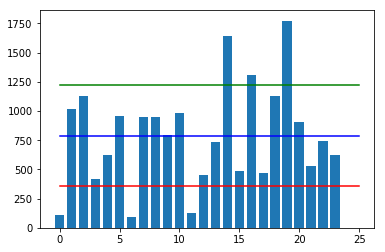

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
y_pos = range(len(friends))

plt.bar(y_pos, friends)
plt.plot((0, 25), (789, 789), 'b-')
plt.plot((0, 25), (789+434, 789+434), 'g-')
plt.plot((0, 25), (789-434, 789-434), 'r-')

In [12]:
z_scores = []
m = np.mean(friends)
s = np.std(friends)
for friend in friends:
    z = (friend - m)/s
    z_scores.append(z)

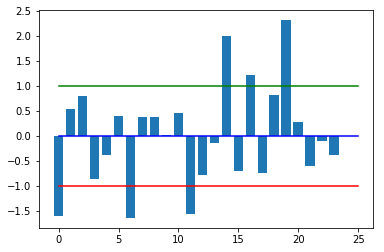

In [13]:
plt.bar(y_pos, z_scores)
plt.plot((0, 25), (1, 1), 'g-')
plt.plot((0, 25), (0, 0), 'b-')
plt.plot((0, 25), (-1, -1), 'r-')

In [14]:
friends = [109, 1017, 1127, 418, 625, 957, 89, 950, 946, 797, 981, 125, 455, 731, 1640, 485, 1309, 472, 1132, 1773, 906, 531, 742, 621]
happiness = [.8, .6, .3, .6, .6, .4, .8, .5, .4, .3, .3, .6, .2, .8, 1, .6, .2, .7, .5, .3, .1, 0, .3, 1]
import pandas as pd

df = pd.DataFrame({'friends':friends, 'happiness':happiness})
df.head()

,friends,happiness
0,109,0.8
1,1017,0.6
2,1127,0.3
3,418,0.6
4,625,0.6


In [15]:
from sklearn import preprocessing
df_scaled = pd.DataFrame(preprocessing.scale(df), columns = ['friends_scaled', 'happiness_scaled'])
df_scaled.head()

/home/silvia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


,friends_scaled,happiness_scaled
0,-1.599495,1.153223
1,0.536040,0.394939
2,0.794750,-0.742486
3,-0.872755,0.394939
4,-0.385909,0.394939


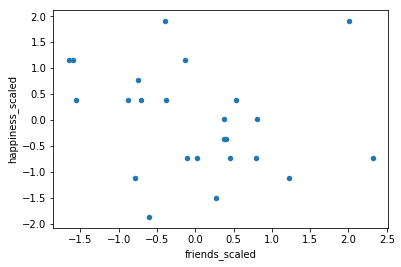

In [16]:
df_scaled.plot(kind='scatter', x = 'friends_scaled', y = 'happiness_scaled')

In [17]:
df.corr()

,friends,happiness
friends,1.000000,-0.216199
happiness,-0.216199,1.000000


In [18]:
df_scaled.corr()

,friends_scaled,happiness_scaled
friends_scaled,1.000000,-0.216199
happiness_scaled,-0.216199,1.000000


In [19]:
np.corrcoef(friends, happiness)

array([[ 1.       , -0.2161988],
       [-0.2161988,  1.       ]])

In [20]:
z_scores_friends = []
m = np.mean(friends)
s = np.std(friends)
for friend in friends:
    z = (friend - m)/s
    z_scores_friends.append(z)
    
z_scores_happiness = []
m = np.mean(happiness)
s = np.std(happiness)
for happy in happiness:
    z = (happy - m)/s
    z_scores_happiness.append(z)

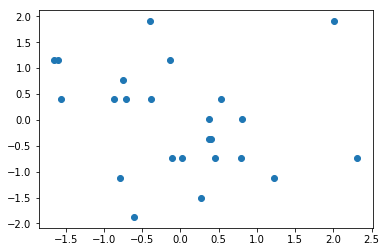

In [21]:
plt.scatter(z_scores_friends, z_scores_happiness)

In [22]:
np.corrcoef(z_scores_friends, z_scores_happiness)

array([[ 1.       , -0.2161988],
       [-0.2161988,  1.       ]])

## The empirical rule

In [23]:
# finding the percentage of people within one standard deviation of the mean
within_1_std = df_scaled[(df_scaled['friends_scaled'] <= 1) & (df_scaled['friends_scaled'] >= -1)].shape[0]
within_1_std / float(df_scaled.shape[0])
# 0.75

0.75

In [24]:
# finding the percentage of people within two standard deviations of the mean
within_2_std = df_scaled[(df_scaled['friends_scaled'] <= 2) & (df_scaled['friends_scaled'] >= -2)].shape[0]
within_2_std / float(df_scaled.shape[0])
# 0.916

0.9166666666666666

In [25]:
# finding the percentage of people within three standard deviations of the mean
within_3_std = df_scaled[(df_scaled['friends_scaled'] <= 3) & (df_scaled['friends_scaled'] >= -3)].shape[0]
within_3_std / float(df_scaled.shape[0])
# 1.0

1.0